<b><h1><i> <center> SALES DATA ANALYSIS 

_____________________________

<h4> IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
# Also for Data Visualisation
import seaborn as sns

<h4> IMPORTING THE DATASET

In [2]:
# Importing dataset
df = pd.read_excel('store_sales.xlsx')

In [3]:
# First five rows of the dataset
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
# Shape of the dataset
df.shape

(51290, 21)

In [5]:
# Columns in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [6]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [7]:
# Checking missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [8]:
# Generating descriptive statistics summary
df.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


_____________________________________

<h3> EXPLORATORY DATA ANALYSIS

1. <h4> WHAT IS THE OVERALL SALES TREND?

In [9]:
# Getting month year from order_date
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [10]:
# grouping month_year by sales
df_temp = df.groupby('month_year').sum()['sales'].reset_index()
df_temp

,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


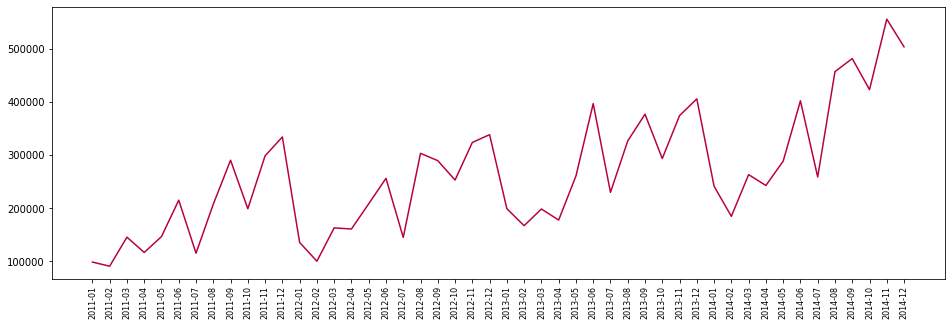

In [11]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_temp['month_year'], df_temp['sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

<h4>2. WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [12]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['sales'], inplace=True, ascending=False)

# Top 10 products by sales
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


<h4>3. WHICH ARE THE MOST SELLING PRODUCTS?

In [13]:
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['quantity'], inplace=True, ascending=False)

# Most selling products
best_selling_prods[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


<h4>4. WHAT IS THE MOST PREFERRED SHIP MODE?

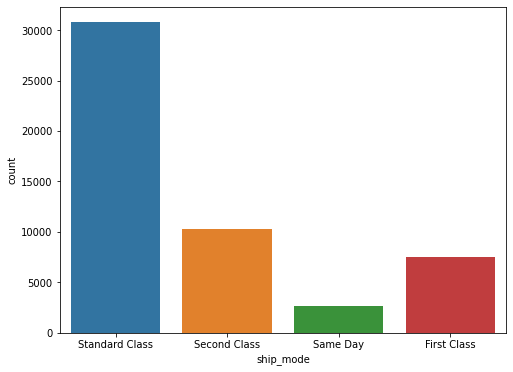

In [14]:
# Setting the figure size
plt.figure(figsize=(8,6))
sns.countplot(x='ship_mode', data=df)

# Display the figure
plt.show()

<h4>5. WHICH ARE THE MOST PROFITABLE SUB-CATEGORY FOR EACH CATEGORY?

In [15]:
# Grouping products by Category and Sub-Category
cat_sub = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

# Sorting the values
cat_sub.sort_values(['category','profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870